In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data and extract date time information
filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/Test%20data.csv'
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

hourly_data = df['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').mean()
hourly_data = hourly_data.reset_index()
hourly_data['hour'] = hourly_data['Date'].dt.hour
hourly_data['day_of_week'] = hourly_data['Date'].dt.dayofweek
hourly_data['day_of_month'] = hourly_data['Date'].dt.day
hourly_data['month'] = hourly_data['Date'].dt.month

# Split data into features and target
features = hourly_data[['hour', 'day_of_week', 'day_of_month', 'month']]
target = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm']


C:\Users\bober\AppData\Local\Temp\ipykernel_4560\2986266637.py:7: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
C:\Users\bober\AppData\Local\Temp\ipykernel_4560\2986266637.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').mean()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)


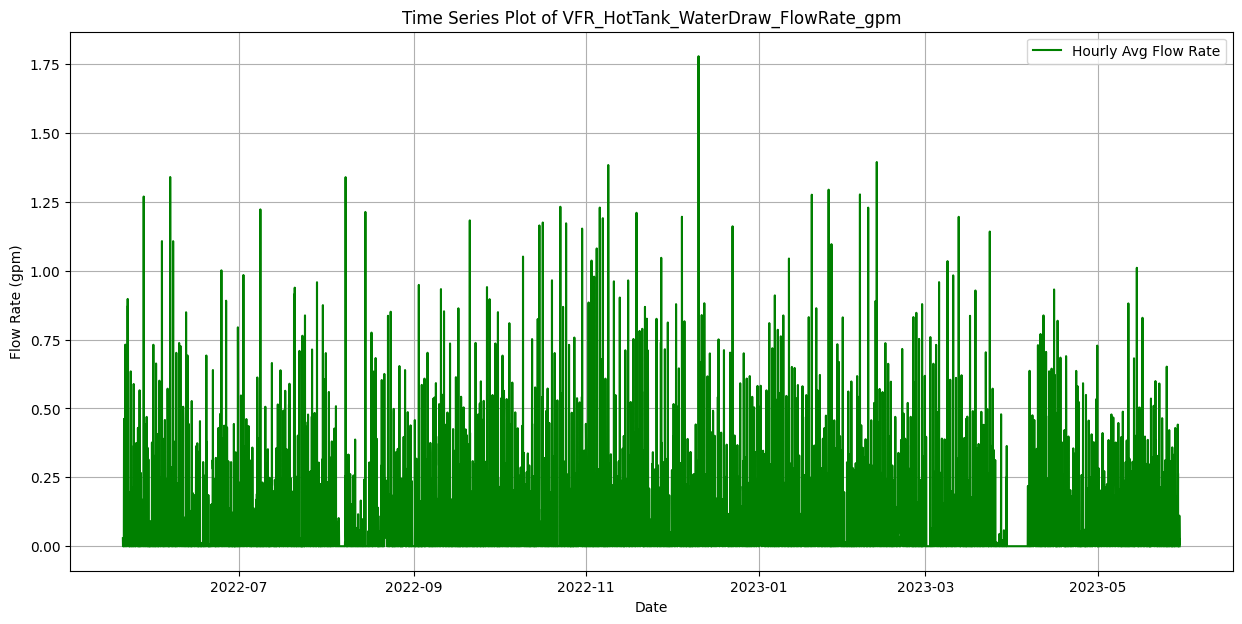

In [16]:
# Time series plot for the resampled water draw flow rate variable
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Hourly Avg Flow Rate', color='green')
plt.title('Time Series Plot of VFR_HotTank_WaterDraw_FlowRate_gpm')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()


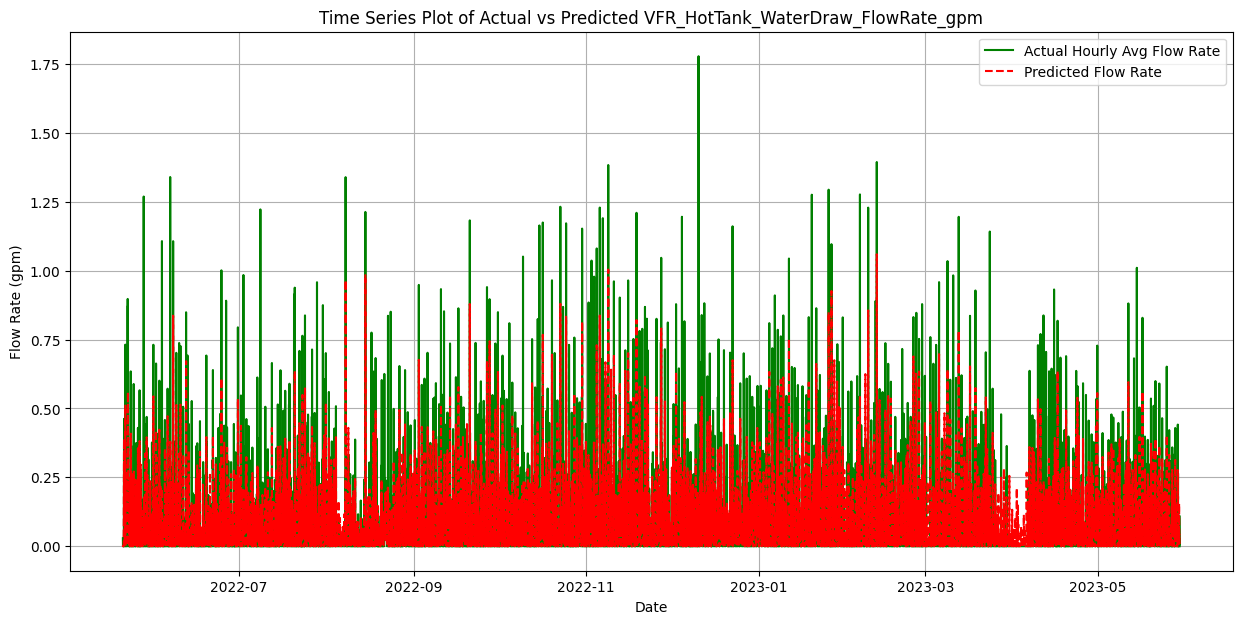

In [17]:
# Generate predictions for the entire dataset
all_features = features  # features were defined previously for the entire dataset
all_predictions = rf_regressor.predict(all_features)

# Add predictions to the hourly data DataFrame for plotting
hourly_data['Predicted_FlowRate_gpm'] = all_predictions

# Time series plot for actual vs predicted flow rates
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Actual Hourly Avg Flow Rate', color='green')
plt.plot(hourly_data['Date'], hourly_data['Predicted_FlowRate_gpm'], label='Predicted Flow Rate', linestyle='--', color='red')
plt.title('Time Series Plot of Actual vs Predicted VFR_HotTank_WaterDraw_FlowRate_gpm')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()
